In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(100,)
(100,)


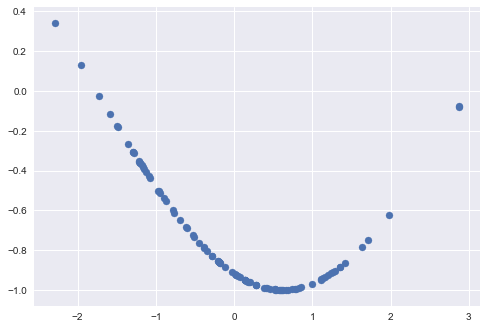

In [35]:
#Custom X and Y 
limit = 100
X = np.linspace(3,1,limit)
noise = np.random.randn(limit)
X = X + noise
Y = np.sin(X * -0.25 * np.pi * np.random.random())
plt.style.use("seaborn")

# ones = np.ones()

X.reshape(-1,1)
Y.reshape(-1,1)

print(X.shape)
print(Y.shape)

X = (X - X.mean())/X.std()

plt.scatter(X,Y)
plt.show()

X_Copy = X
Y_Copy = Y

In [36]:
X = np.mat(X)
Y = np.mat(Y)

print(X.shape)
print(Y.shape)

(1, 100)
(1, 100)


In [37]:
def getW(query_point,X,tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    x = query_point
    
    for i in range(m):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

# X = np.asmatrix(X)
# # Y = np.asmatrix(Y)

X = X.T
Y = Y.T


m = X.shape[0]

print("X - ",X.shape)
print("Y - ",Y.shape)

W = getW(1,X,0.5)


print(W.shape)
print(W)

X -  (100, 1)
Y -  (100, 1)
(100, 100)
[[9.73442358e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.68444301e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.28564333e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.21564026e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.50327701e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.36258657e-02]]


In [47]:
def predict(X,Y,query_x,tau=0.1):
    ones = np.ones((m,1))
#     print(ones)
    X_ = np.hstack((X,ones))
    qx = np.mat([query_x,1])
    print("X_ - ",X_.shape)
    print("qx - ",qx.shape)
    W = getW(qx,X_,tau)
    
    theta = np.linalg.pinv(X_.T *(W*X_)) * (X_.T *(W*Y))
    pred = np.dot(qx, theta)
    return theta,pred

print(X.shape)
print(Y.shape)

theta,pred = predict(X,Y,1.0,0.1)

(100, 1)
(100, 1)
X_ -  (100, 2)
qx -  (1, 2)


In [48]:
print(theta)
print(pred)

[[ 0.16102782]
 [-1.1256522 ]]
[[-0.96462438]]


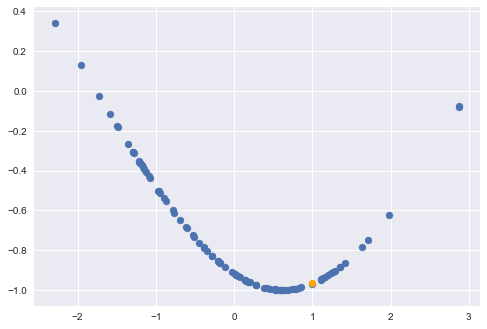

In [49]:
plt.scatter(X_Copy,Y_Copy)
x_pred = [[1]]
pred = np.array(pred)
plt.scatter(x_pred,pred,color='orange')
plt.show()

In [52]:
for i in range(len(X_Copy)):
    x = X_Copy[i]
    if x > 0.9 and x < 1.1:
        print(Y_Copy[i])
        break

-0.9684144081109279
